In [127]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import tools needed for visualization

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
################################################################################

In [128]:
df = pd.read_csv('Global_Landslide_Final.csv')
df.shape 

(9132, 22)

In [129]:
df.head(5)

,landslide_trigger,event_id,formatted_date,event_date,event_month,event_day,event_time,event_title,event_description,location_description,...,landslide_size,fatality_count,injury_count,country_name,country_code,population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
0,Construction,7544,7/14/2015 23:00,7/14/2015,7,14,23:00,Highbury Rd and Huntingdale Rd,WITNESSES have detailed the dramatic moment th...,Highbury Rd and Huntingdale Rd,...,small,NaN,NaN,Australia,AU,11886.0,Burwood,0.77420,145.1147,-37.8558
1,Construction,7616,8/6/2015 0:00,8/6/2015,8,6,9:00,Atlanta Point,"The PBMC Chairperson, Mr. Armugam has made an ...",Atlanta Point,...,medium,0.0,0.0,India,IN,112050.0,Port Blair,0.96496,92.7490,11.6753
2,Construction,9558,9/27/2016 0:00,9/27/2016,9,27,0:00,Basaksehir district,People had been working both at the top and at...,Basaksehir district,...,medium,0.0,0.0,Turkey,TR,193750.0,BaÅŸakÅŸehir,2.78453,28.7701,41.0863
3,Construction,6480,8/12/2014 0:00,8/12/2014,8,12,2:30,the metro bus flyover project in Sector G9,The labourers were busy in work on the metro b...,the metro bus flyover project in Sector G9,...,small,2.0,4.0,Pakistan,PK,601600.0,Islamabad,3.05654,73.0399,33.6941
4,Construction,6030,5/17/2014 0:00,5/17/2014,5,17,9:00,Dariali Gorge,A landslide in the Dariali Gorge in Georgia ha...,Dariali Gorge,...,medium,8.0,0.0,Georgia,GE,2628.0,Stepâ€™antsminda,9.57790,44.5015,42.7204


In [130]:
df.tail()

,landslide_trigger,event_id,formatted_date,event_date,event_month,event_day,event_time,event_title,event_description,location_description,...,landslide_size,fatality_count,injury_count,country_name,country_code,population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
9127,Tropical_Cyclone,1079,8/10/2009 0:00,8/10/2009,8,10,0:00,"Alishan, central Taiwan","The storm destroyed the homes of 7,000 people ...","Alishan, central Taiwan",...,large,0.0,NaN,Taiwan,TW,0.0,Jiayi Shi,34.24073,120.7803,23.4333
9128,Tropical_Cyclone,7637,8/8/2015 0:00,8/8/2015,8,8,0:00,Wenzhou city in the province of Zhejiang,Twelve of the casualties were reported in and ...,Wenzhou city in the province of Zhejiang,...,large,0.0,0.0,China,CN,0.0,Louqiao,2.04056,120.6168,27.9982
9129,Tropical_Cyclone,1083,8/10/2009 0:00,8/10/2009,8,10,0:00,Chiayi county,Article only lists places where landslides wer...,Chiayi county,...,large,NaN,NaN,Taiwan,TW,0.0,Jiayi Shi,13.02540,120.5742,23.4575
9130,Tropical_Cyclone,1082,8/10/2009 0:00,8/10/2009,8,10,0:00,Tainan county,Article only lists places where landslides wer...,Tainan county,...,large,NaN,NaN,Taiwan,TW,0.0,Xinying,14.68538,120.2974,23.1749
9131,Tropical_Cyclone,1080,8/10/2009 0:00,8/10/2009,8,10,0:00,Namsha in Kaohsiung,An aerial view of a mudslide-hit area in Namsh...,Namsha in Kaohsiung,...,large,NaN,NaN,Taiwan,TW,1519711.0,Kaohsiung,6.82091,120.2858,22.6723


In [131]:
df.landslide_trigger.unique() 

array(['Construction', 'Earthquake', 'Flooding', 'Mining', 'Monsoon',
       'Rain', 'Snow', 'Tropical_Cyclone'], dtype=object)

In [132]:
df = df.drop(columns=['formatted_date','event_date','event_day','event_title',
                      'event_id','event_description','location_description',
                      'location_accuracy','gazeteer_closest_point', 'country_code','gazeteer_distance'])
df = df.dropna(subset=['landslide_trigger'])

In [133]:
df['fatality_count'].fillna((df['fatality_count'].median()), inplace=True)
df['injury_count'].fillna((df['injury_count'].median()), inplace=True)
df['population'].fillna((df['population'].median()), inplace=True)

In [134]:
df.isnull().sum()

landslide_trigger        0
event_month              0
event_time             397
landslide_category       0
landslide_size           0
fatality_count           0
injury_count             0
country_name          1160
population               0
longitude                0
latitude                 0
dtype: int64

In [135]:
# Delete attribute values that we don't want to classify:
df = df[df.landslide_size != "catastrophic"]
df = df[df.landslide_category != "unknown"]
df = df[df.landslide_category != "other"]
df = df[df.country_name != "NaN"]

In [136]:
df['event_time'] = df['event_time'].replace('unknown', 'NaN')

In [137]:
# Update landlside size values so reduce unnessessary unique values
df['landslide_size'] = df['landslide_size'].replace('very_large', 'large')
print('Landslide triggers:', df.landslide_trigger.unique())

Landslide triggers: ['Construction' 'Earthquake' 'Flooding' 'Mining' 'Monsoon' 'Rain' 'Snow'
 'Tropical_Cyclone']


Rain                7964
Tropical_Cyclone     562
Snow                 133
Monsoon              129
Mining                93
Earthquake            89
Construction          86
Flooding              74
Name: landslide_trigger, dtype: int64

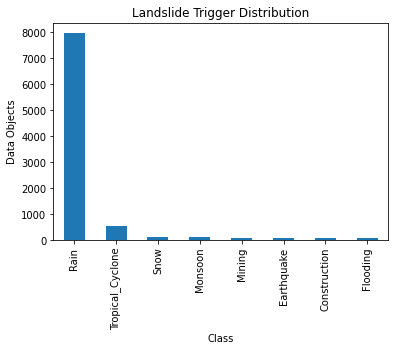

In [138]:
# Print graph showing imbalanced data:
pd.value_counts(df['landslide_trigger']).plot.bar()
plt.title('Landslide Trigger Distribution')
plt.xlabel('Class')
plt.ylabel('Data Objects')
df['landslide_trigger'].value_counts()

In [139]:
df.head()

,landslide_trigger,event_month,event_time,landslide_category,landslide_size,fatality_count,injury_count,country_name,population,longitude,latitude
0,Construction,7,23:00,slide,small,0.0,0.0,Australia,11886.0,145.1147,-37.8558
1,Construction,8,9:00,slide,medium,0.0,0.0,India,112050.0,92.7490,11.6753
2,Construction,9,0:00,rock_fall,medium,0.0,0.0,Turkey,193750.0,28.7701,41.0863
3,Construction,8,2:30,slide,small,2.0,4.0,Pakistan,601600.0,73.0399,33.6941
4,Construction,5,9:00,slide,medium,8.0,0.0,Georgia,2628.0,44.5015,42.7204


In [140]:
# Make sure all categorical data is string value only
df['event_time'] = df['event_time'].astype(str)
df['landslide_category'] = df['landslide_category'].astype(str) 
df['country_name'] = df['country_name'].astype(str) #make sure all country name values are strings

In [141]:
# Label Encode our categorical data with dummy variables
df = pd.get_dummies(df, prefix=['event_time','country_name','landslide_category','landslide_size'], 
                    columns=['event_time','country_name','landslide_category','landslide_size'])

In [142]:
df.to_csv("new.csv")

In [143]:
df.head()

,landslide_trigger,event_month,fatality_count,injury_count,population,longitude,latitude,event_time_0:00,event_time_0:30,event_time_10:00,...,landslide_category_earth_fall,landslide_category_earth_flow,landslide_category_lahar,landslide_category_rock_fall,landslide_category_slide,landslide_category_snow_avalanche,landslide_size_large,landslide_size_medium,landslide_size_small,landslide_size_unknown
0,Construction,7,0.0,0.0,11886.0,145.1147,-37.8558,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Construction,8,0.0,0.0,112050.0,92.7490,11.6753,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,Construction,9,0.0,0.0,193750.0,28.7701,41.0863,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,Construction,8,2.0,4.0,601600.0,73.0399,33.6941,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Construction,5,8.0,0.0,2628.0,44.5015,42.7204,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [144]:
# Label Encode our trigger values into numbers
df["landslide_trigger"] = df["landslide_trigger"].astype('category')
df["landslide_trigger"] = df["landslide_trigger"].cat.codes
df.head(5)

,landslide_trigger,event_month,fatality_count,injury_count,population,longitude,latitude,event_time_0:00,event_time_0:30,event_time_10:00,...,landslide_category_earth_fall,landslide_category_earth_flow,landslide_category_lahar,landslide_category_rock_fall,landslide_category_slide,landslide_category_snow_avalanche,landslide_size_large,landslide_size_medium,landslide_size_small,landslide_size_unknown
0,0,7,0.0,0.0,11886.0,145.1147,-37.8558,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,8,0.0,0.0,112050.0,92.7490,11.6753,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,9,0.0,0.0,193750.0,28.7701,41.0863,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,8,2.0,4.0,601600.0,73.0399,33.6941,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,5,8.0,0.0,2628.0,44.5015,42.7204,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [145]:
# Split our labels into their own array
Y = np.array(df['landslide_trigger'])  # values we want to predict
# Remove the labels from the features, axis 1 refers to the col
df = df.drop('landslide_trigger',axis=1)

In [146]:
# Save the column headers 
feature_list = list(df.columns)
X = df.values # Holds our data objects and attributes

In [147]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size =.20)

In [148]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7304, 180)
Training Labels Shape: (7304,)
Testing Features Shape: (1826, 180)
Testing Labels Shape: (1826,)


In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [150]:
sd=RandomForestClassifier()
sd.fit(train_features,train_labels)
sd.score(test_features,test_labels)

0.8981380065717415

In [151]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    recall = 100 * recall_score(test_labels, predictions, average='macro')
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Recall = {:0.2f}%.'.format(recall))
    return accuracy

In [152]:
rf_accuracy = evaluate(sd, test_features, test_labels)

Model Performance
Average Error: 0.2338 degrees.
Accuracy = nan%.
Recall = 27.28%.


In [153]:
predictions=sd.predict(test_features)

In [154]:

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

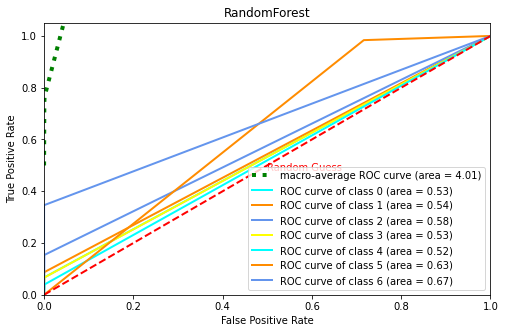

In [155]:
n_classes=7
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(test_labels))[:, i], np.array(pd.get_dummies(predictions))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest')
plt.legend(loc="lower right")
plt.show()

In [156]:
def model_report(model_predictions):
    triggers = [0,1,2,3,4,5,6,7]
    print(classification_report(test_labels, model_predictions))
 

In [157]:
confusion=confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n%s" % confusion)

Confusion Matrix:
[[   1    0    0    0    0   14    0    0]
 [   0    2    0    0    0   21    0    0]
 [   0    0    2    0    0   11    0    0]
 [   0    0    0    1    0   14    0    0]
 [   0    0    0    0    1   23    0    1]
 [   0    0    1    1    2 1578    0   22]
 [   0    0    0    0    0   17    9    0]
 [   0    0    0    0    0   59    0   46]]


In [158]:
model_report(predictions)

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       1.00      0.09      0.16        23
           2       0.67      0.15      0.25        13
           3       0.50      0.07      0.12        15
           4       0.33      0.04      0.07        25
           5       0.91      0.98      0.94      1604
           6       1.00      0.35      0.51        26
           7       0.67      0.44      0.53       105

    accuracy                           0.90      1826
   macro avg       0.76      0.27      0.34      1826
weighted avg       0.88      0.90      0.87      1826



In [159]:
en=sd.predict([[8,0.0,0.0,0.0,120.5742,23.4575,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
]])
print(en)

[7]


In [160]:
if en==0:
    print("Construction")
elif en==1:
    print("Earthquake")
elif en==2:
    print("Flooding")
elif en==3:
    print("Mining")
elif en==4:
    print("Monsoon")
elif en==5:
    print("Rain")
elif en==6:
    print("Snow")
elif en==7:
    print("Tropical_Cyclone")

Tropical_Cyclone


In [161]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.001, max_depth=1, n_estimators=100)
xgb_model.fit(train_features, train_labels)
print("accuracy of boosting model"+" "+str(xgb_model.score(test_features,test_labels)))

accuracy of boosting model 0.8784227820372399


In [162]:
models = {
    DecisionTreeClassifier():'decision tree',
    RandomForestClassifier():'Random Forest',
    LogisticRegression():'logistic',
    SVC():'svm',
    
}
for m in models.keys():
    m.fit(train_features,train_labels)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(test_features,test_labels)*100,"%")

Accuracy Score for decision tree is :  85.59693318729464 %
Accuracy Score for Random Forest is :  89.92332968236583 %
Accuracy Score for logistic is :  70.48192771084338 %
Accuracy Score for svm is :  87.84227820372399 %


In [163]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))  
	level0.append(('rf', RandomForestClassifier())) 
	level0.append(('ds', DecisionTreeClassifier())) 
	

	# define meta learner model
	level1 = RandomForestClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [164]:
model=get_stacking()
model.fit(train_features,train_labels)
print("accuracy of stacking model"+" "+str(model.score(test_features,test_labels)))


accuracy of stacking model 0.9036144578313253


In [165]:
predict=model.predict(test_features)

In [166]:
print(classification_report(test_labels, predict))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.67      0.09      0.15        23
           2       0.00      0.00      0.00        13
           3       0.67      0.27      0.38        15
           4       0.67      0.08      0.14        25
           5       0.91      0.99      0.95      1604
           6       0.75      0.46      0.57        26
           7       0.71      0.47      0.56       105

    accuracy                           0.90      1826
   macro avg       0.61      0.30      0.36      1826
weighted avg       0.88      0.90      0.88      1826



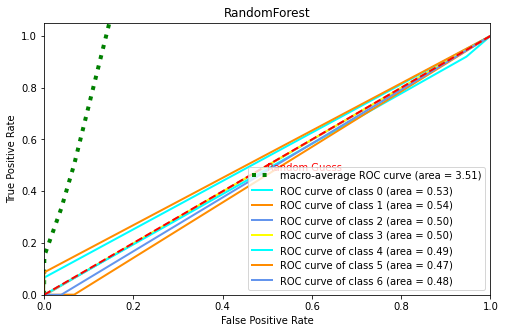

In [167]:
n_classes=7
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(test_labels))[:, i], np.array(pd.get_dummies(predict))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest')
plt.legend(loc="lower right")
plt.show()

In [168]:
# import pickle
# with open('model.pkl','wb') as f:
#     pickle.dump(model,f)
# loaded_model = pickle.load(open("model.pkl", 'rb'))